In [1]:
import platform 
print(platform.python_version())

3.7.0


In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

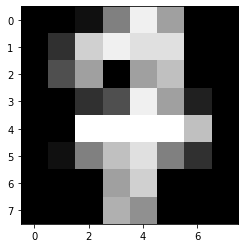

In [5]:
idx = 17
plt.imshow(digits['images'][idx], cmap=plt.cm.gray, interpolation='none')

In [6]:
digits['target'][idx]

7

In [7]:
digits['images'].shape

(1797, 8, 8)

In [8]:
digits['data'].shape

(1797, 64)

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

Using TensorFlow backend.


In [10]:
X = digits['data']
y = digits['target']

In [11]:
y = np_utils.to_categorical(y)

In [12]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
in_dim = X.shape[1]
out_dim = y.shape[1]

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

In [16]:
model = Sequential()
model.add(Dense(128, input_shape=(in_dim,)))
model.add(Activation('relu'))
model.add(Dense(out_dim))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.fit(X_train, y_train)

40/40 [==============================] - 0s 575us/step - loss: 0.0283 - accuracy: 0.9968


In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

17/17 [==============================] - 0s 471us/step - loss: 0.1420 - accuracy: 0.9630


0.9629629850387573

In [32]:
model.predict(X_test[:3])

array([[2.2615605e-08, 9.1289151e-01, 1.3733506e-03, 8.7240338e-04,
        7.2503090e-04, 6.5527170e-06, 6.6482979e-05, 4.4702167e-05,
        3.7325293e-02, 2.6044250e-04],
       [4.6158162e-09, 3.4496145e-05, 1.7675210e-06, 6.2480403e-11,
        2.2966832e-07, 2.8283218e-09, 3.1407762e-08, 6.8208333e-10,
        2.1334291e-03, 4.6951857e-07],
       [6.7585204e-09, 5.4163933e-02, 1.1106675e-06, 5.1176139e-06,
        2.7175178e-09, 1.1866138e-07, 9.8093302e-09, 1.5311410e-09,
        1.4717160e-07, 1.5142560e-04]], dtype=float32)

In [33]:
model.predict(X_test[:3]).argmax(axis=1)

array([1, 8, 1], dtype=int64)

In [34]:
y_test[:3].argmax(axis=1)

array([1, 8, 1], dtype=int64)

In [35]:
model.save('digits.h5')

In [36]:
from tensorflow.keras.models import load_model
model1 = load_model('digits.h5')

In [37]:
model1.predict(X_test[:3]).argmax(axis=1)

array([1, 8, 1], dtype=int64)